In [1]:
library("ISLR")
library("MASS")
library("car")
library("repr")

Loading required package: carData
Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


In [2]:
# Simple linear regression
## Data: Boston data set, which records medv (median house value) for 506 neighborhoods around Boston
## Goal: Predict medv using 13 predictors, such as rm (average number of rooms per house), age (average age of houses), and lstat (percent of households with low socioeconomic status)
slr_model = lm(medv ~ lstat, data = Boston)
slr_model              # To view the basic info
summary(slr_model)     # To view the detailed info 


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  



Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [3]:
names(slr_model)       # To see all available quantities
slr_model$coefficients # To extract specific variable value using selection 
coef(slr_model)        # To extract specific variable value using function
confint(slr_model)     # To obtain confidence interval for coefficient estimates 

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

(Intercept)       lstat 
 34.5538409  -0.9500494

(Intercept)       lstat 
 34.5538409  -0.9500494

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [4]:
# To produce confidence intervals for the prediction: Center around predicted value (Narrower)
predict(slr_model, data.frame(lstat = (c(5, 10, 15))), interval = "confidence")
# To produce prediction intervals for the prediction: Center around predicted value (Wider)
predict(slr_model, data.frame(lstat = (c(5, 10, 15))), interval = "prediction")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


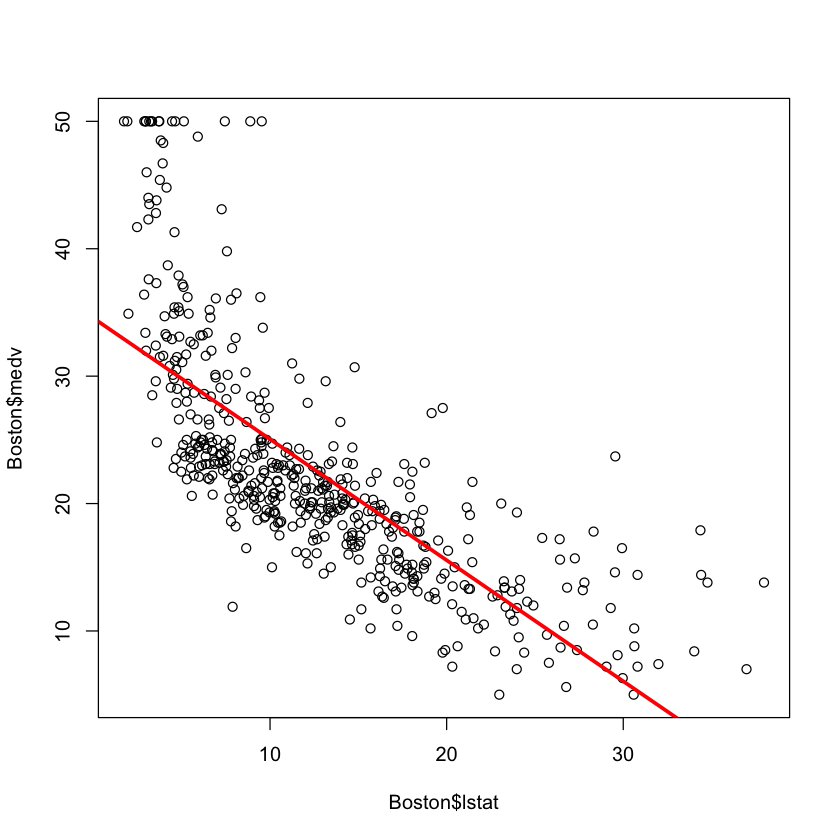

In [5]:
# To plot scatterplot + regression line
plot(Boston$lstat, Boston$medv)
abline(slr_model, lwd = 3, col = "red")

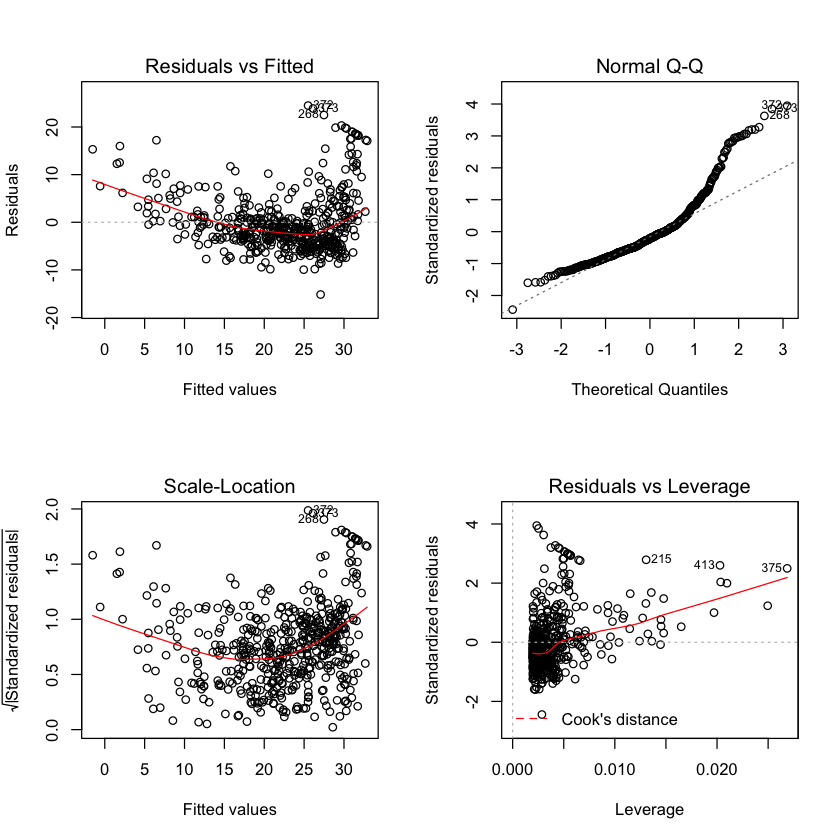

In [6]:
# To plot diagnostic plots
par(mfrow = c(2, 2))
plot(slr_model)

In [7]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 100)

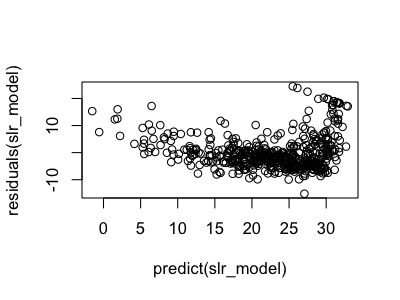

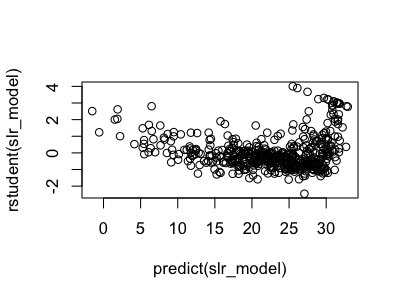

In [8]:
# To plot residual plots: 
## Residuals ~ Fitted values
plot(predict(slr_model), residuals(slr_model)) 
## Studentized residuals ~ Fitted values
plot(predict(slr_model), rstudent(slr_model))

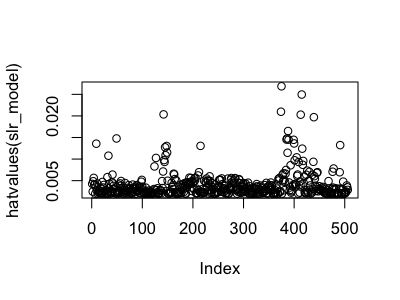

In [9]:
# To compute leverage statistics
plot(hatvalues(slr_model))

In [10]:
# Multiple linear regression
## Data: Boston data set, which records medv (median house value) for 506 neighborhoods around Boston
## Goal: Predict medv using 13 predictors, such as rm (average number of rooms per house), age (average age of houses), and lstat (percent of households with low socioeconomic status)
mlr_model_1 = lm(medv ~ ., data = Boston)           # To run model using all of predictors 
mlr_model_2 = lm(medv ~ . -age, data = Boston)      # To run model using all of predictors but one 
mlr_model_3 = lm(medv ~ lstat * age, data = Boston) # To run model using main effects and intercation term
summary(mlr_model_1)
summary(mlr_model_2)
summary(mlr_model_3)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [11]:
# To access components: R-squared; RSE 
summary(mlr_model_1)$r.sq       
summary(mlr_model_1)$sigma
summary(mlr_model_2)$r.sq
summary(mlr_model_2)$sigma
summary(mlr_model_3)$r.sq
summary(mlr_model_3)$sigma

[1] 0.7406427

[1] 4.745298

[1] 0.7406412

[1] 4.740496

[1] 0.5557265

[1] 6.148513

In [12]:
# To compute variance inflation factors (VIF)
vif(mlr_model_1)
vif(mlr_model_2)
vif(mlr_model_3)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

crim       zn    indus     chas      nox       rm      dis      rad 
1.792172 2.265290 3.991592 1.071227 4.084846 1.851068 3.620246 7.441492 
     tax  ptratio    black    lstat 
9.000474 1.788084 1.343044 2.599229

lstat       age lstat:age 
19.101862  4.182822 29.300393

In [13]:
# Transformed predictors: Y ~ X + X^2
## Null hypothesis: Full model == Baseline model
## Alternative hypothesis: Full model >> Baseline model (P-value ~ 0)
comp_model_1 = lm(medv ~ lstat, data = Boston)
comp_model_2 = lm(medv ~ poly(lstat, 2), data = Boston)
anova(comp_model_1, comp_model_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,19472.38,NA,NA,NA,NA
2,503,15347.24,1,4125.138,135.1998,7.630116e-28


In [14]:
# Qualitative predictors 
## Data: Carseats data set
## Goal: Predict sales (child car seat sales) in 400 locations based on a number of predictors (Ex: Shelveloc, an indicator of the quality of the shelving location)
names(Carseats)
# Fit model using interaction terms without main effects: X1:X2
# Fit model using interaction terms with main effects: X1*X2
qp_model = lm(Sales ~ . + Income:Advertising + Price:Age, data = Carseats)
summary(qp_model)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

In [15]:
# Function
LoadLibraries = function(){
    library("ISLR")
    library("MASS")
    print("The libraries have been loaded.") 
}
LoadLibraries()

[1] "The libraries have been loaded."
